In [1]:
pdb_id = "3bf0"
f = open(pdb_id+".pdb")
content = f.readlines()
f.close()

In [2]:
content

['HEADER    HYDROLASE                               20-NOV-07   3BF0              \n',
 'TITLE     CRYSTAL STRUCTURE OF ESCHERICHIA COLI SIGNAL PEPTIDE PEPTIDASE (SPPA),\n',
 'TITLE    2 NATIVE CRYSTALS                                                      \n',
 'COMPND    MOL_ID: 1;                                                            \n',
 'COMPND   2 MOLECULE: PROTEASE 4;                                                \n',
 'COMPND   3 CHAIN: A, B, C, D;                                                   \n',
 'COMPND   4 SYNONYM: PROTEASE IV, ENDOPEPTIDASE IV, SIGNAL PEPTIDE PEPTIDASE;    \n',
 'COMPND   5 EC: 3.4.21.-;                                                        \n',
 'COMPND   6 ENGINEERED: YES                                                      \n',
 'SOURCE    MOL_ID: 1;                                                            \n',
 'SOURCE   2 ORGANISM_SCIENTIFIC: ESCHERICHIA COLI;                               \n',
 'SOURCE   3 ORGANISM_TAXID: 562;          

In [3]:
for line in content.copy():
    if line[:4] != "ATOM":
        content.remove(line)

In [4]:
content

['ATOM      1  N   ARG A  56     -19.119  49.353 -52.332  1.00 49.32           N  \n',
 'ATOM      2  CA  ARG A  56     -17.823  49.838 -51.756  1.00 50.01           C  \n',
 'ATOM      3  C   ARG A  56     -17.512  49.307 -50.318  1.00 48.69           C  \n',
 'ATOM      4  O   ARG A  56     -17.857  48.158 -49.996  1.00 49.18           O  \n',
 'ATOM      5  CB  ARG A  56     -17.716  51.375 -51.874  1.00 49.85           C  \n',
 'ATOM      6  CG  ARG A  56     -17.335  51.854 -53.284  1.00 51.39           C  \n',
 'ATOM      7  CD  ARG A  56     -16.556  53.196 -53.280  1.00 52.92           C  \n',
 'ATOM      8  NE  ARG A  56     -16.660  53.918 -54.566  1.00 59.43           N  \n',
 'ATOM      9  CZ  ARG A  56     -17.605  54.830 -54.868  1.00 61.47           C  \n',
 'ATOM     10  NH1 ARG A  56     -18.550  55.164 -53.984  1.00 61.63           N  \n',
 'ATOM     11  NH2 ARG A  56     -17.616  55.421 -56.066  1.00 61.06           N  \n',
 'ATOM     12  N   GLY A  57     -16.817  5

In [5]:
coordinates = []

for line in content:
    words = line.split()
    atom_type = words[2]
    residue = words[3]
    residue_id = words[5]
    x = words[6]
    y = words[7]
    z = words[8]
    if atom_type in ["N","CA","C"]:
        coordinates.append([residue_id,residue,atom_type,x,y,z])

In [6]:
coordinates

[['56', 'ARG', 'N', '-19.119', '49.353', '-52.332'],
 ['56', 'ARG', 'CA', '-17.823', '49.838', '-51.756'],
 ['56', 'ARG', 'C', '-17.512', '49.307', '-50.318'],
 ['57', 'GLY', 'N', '-16.817', '50.104', '-49.494'],
 ['57', 'GLY', 'CA', '-16.506', '49.734', '-48.105'],
 ['57', 'GLY', 'C', '-15.069', '49.353', '-47.759'],
 ['58', 'ALA', 'N', '-14.749', '49.435', '-46.471'],
 ['58', 'ALA', 'CA', '-13.509', '48.919', '-45.903'],
 ['58', 'ALA', 'C', '-13.407', '47.398', '-46.001'],
 ['59', 'LEU', 'N', '-12.169', '46.908', '-46.018'],
 ['59', 'LEU', 'CA', '-11.899', '45.536', '-45.695'],
 ['59', 'LEU', 'C', '-11.622', '45.471', '-44.209'],
 ['60', 'LEU', 'N', '-12.328', '44.565', '-43.534'],
 ['60', 'LEU', 'CA', '-12.231', '44.410', '-42.092'],
 ['60', 'LEU', 'C', '-11.330', '43.226', '-41.756'],
 ['61', 'LEU', 'N', '-10.138', '43.526', '-41.242'],
 ['61', 'LEU', 'CA', '-9.209', '42.477', '-40.818'],
 ['61', 'LEU', 'C', '-9.443', '42.212', '-39.343'],
 ['62', 'ASP', 'N', '-10.506', '41.466', '

In [7]:
simpler_coordinates = []

for i in range(int(coordinates[-1][0])):
    N = coordinates[3*i]
    CA = coordinates[3*i + 1]
    C = coordinates[3*i + 2]
    
    residue_id = int(N[0])
    residue = N[1]
    N_x = float(N[3])
    N_y = float(N[4])
    N_z = float(N[5])
    CA_x = float(CA[3])
    CA_y = float(CA[4])
    CA_z = float(CA[5])
    C_x = float(C[3])
    C_y = float(C[4])
    C_z = float(C[5])
    
    simpler_coordinates.append([residue_id,residue,N_x,N_y,N_z,CA_x,CA_y,CA_z,C_x,C_y,C_z])

In [8]:
simpler_coordinates

[[56,
  'ARG',
  -19.119,
  49.353,
  -52.332,
  -17.823,
  49.838,
  -51.756,
  -17.512,
  49.307,
  -50.318],
 [57,
  'GLY',
  -16.817,
  50.104,
  -49.494,
  -16.506,
  49.734,
  -48.105,
  -15.069,
  49.353,
  -47.759],
 [58,
  'ALA',
  -14.749,
  49.435,
  -46.471,
  -13.509,
  48.919,
  -45.903,
  -13.407,
  47.398,
  -46.001],
 [59,
  'LEU',
  -12.169,
  46.908,
  -46.018,
  -11.899,
  45.536,
  -45.695,
  -11.622,
  45.471,
  -44.209],
 [60,
  'LEU',
  -12.328,
  44.565,
  -43.534,
  -12.231,
  44.41,
  -42.092,
  -11.33,
  43.226,
  -41.756],
 [61,
  'LEU',
  -10.138,
  43.526,
  -41.242,
  -9.209,
  42.477,
  -40.818,
  -9.443,
  42.212,
  -39.343],
 [62,
  'ASP',
  -10.506,
  41.466,
  -39.08,
  -10.838,
  41.084,
  -37.742,
  -10.338,
  39.643,
  -37.596],
 [63,
  'ILE',
  -9.007,
  39.491,
  -37.65,
  -8.425,
  38.157,
  -37.642,
  -8.706,
  37.501,
  -36.282],
 [64,
  'SER',
  -9.065,
  36.223,
  -36.309,
  -9.362,
  35.555,
  -35.069,
  -8.608,
  34.259,
  -34.969],
 [65

In [9]:
import pandas as pd

In [10]:
df = pd.DataFrame(simpler_coordinates)

In [11]:
df

,0,1,2,3,4,5,6,7,8,9,10
0,56,ARG,-19.119,49.353,-52.332,-17.823,49.838,-51.756,-17.512,49.307,-50.318
1,57,GLY,-16.817,50.104,-49.494,-16.506,49.734,-48.105,-15.069,49.353,-47.759
2,58,ALA,-14.749,49.435,-46.471,-13.509,48.919,-45.903,-13.407,47.398,-46.001
3,59,LEU,-12.169,46.908,-46.018,-11.899,45.536,-45.695,-11.622,45.471,-44.209
4,60,LEU,-12.328,44.565,-43.534,-12.231,44.410,-42.092,-11.330,43.226,-41.756
...,...,...,...,...,...,...,...,...,...,...,...
544,146,LYS,10.210,-16.556,-61.008,9.894,-15.137,-60.897,10.693,-14.456,-59.754
545,147,PRO,11.275,-13.265,-59.982,12.134,-12.806,-58.897,11.403,-12.205,-57.679
546,148,VAL,12.081,-12.233,-56.531,11.577,-11.675,-55.293,12.639,-10.695,-54.860
547,149,TYR,12.279,-9.404,-54.769,13.200,-8.335,-54.257,12.857,-7.826,-52.855


In [12]:
df.columns = ["ResID","Residue Type","N x", "N y", "N z", "CA x", "CA y", "CA z","C x", "C y", "C z"]

In [13]:
df

,ResID,Residue Type,N x,N y,N z,CA x,CA y,CA z,C x,C y,C z
0,56,ARG,-19.119,49.353,-52.332,-17.823,49.838,-51.756,-17.512,49.307,-50.318
1,57,GLY,-16.817,50.104,-49.494,-16.506,49.734,-48.105,-15.069,49.353,-47.759
2,58,ALA,-14.749,49.435,-46.471,-13.509,48.919,-45.903,-13.407,47.398,-46.001
3,59,LEU,-12.169,46.908,-46.018,-11.899,45.536,-45.695,-11.622,45.471,-44.209
4,60,LEU,-12.328,44.565,-43.534,-12.231,44.410,-42.092,-11.330,43.226,-41.756
...,...,...,...,...,...,...,...,...,...,...,...
544,146,LYS,10.210,-16.556,-61.008,9.894,-15.137,-60.897,10.693,-14.456,-59.754
545,147,PRO,11.275,-13.265,-59.982,12.134,-12.806,-58.897,11.403,-12.205,-57.679
546,148,VAL,12.081,-12.233,-56.531,11.577,-11.675,-55.293,12.639,-10.695,-54.860
547,149,TYR,12.279,-9.404,-54.769,13.200,-8.335,-54.257,12.857,-7.826,-52.855


In [14]:
shift = df.iloc[0]["ResID"]

In [15]:
if df.iloc[0]["ResID"] != 0:
    df["ResID"] = df["ResID"].apply(lambda x: x - df.iloc[0]["ResID"])

In [16]:
import numpy as np

In [17]:
def calculate_dihedral(x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,y4,z4):
    
    a = [x2-x1,y2-y1,z2-z1]
    b = [x3-x2,y3-y2,z3-z2]
    c = [x4-x3,y4-y3,z4-z3]
    
    mod_a = np.linalg.norm(a)
    mod_b = np.linalg.norm(b)
    mod_c = np.linalg.norm(c)
    
    theta_ab = np.arccos(np.dot(a,b) / (mod_a * mod_b))
    theta_bc = np.arccos(np.dot(b,c) / (mod_b * mod_c))
    
    n_ab = np.cross(a,b) / (mod_a * mod_b * np.sin(theta_ab))
    n_bc = np.cross(b,c) / (mod_b * mod_c * np.sin(theta_bc))
    
    tau = np.arccos(np.dot(n_ab,n_bc))
    
    stp = np.dot(a,np.cross(b,c))
        
    if stp >= 0:
        return tau
    elif stp < 0:
        return -tau

In [18]:
def phi(res_id):
        
    x1 = df.iloc[res_id - 1]["C x"]
    y1 = df.iloc[res_id - 1]["C y"]
    z1 = df.iloc[res_id - 1]["C z"]
    x2 = df.iloc[res_id]["N x"]
    y2 = df.iloc[res_id]["N y"]
    z2 = df.iloc[res_id]["N z"]
    x3 = df.iloc[res_id]["CA x"]
    y3 = df.iloc[res_id]["CA y"]
    z3 = df.iloc[res_id]["CA z"]
    x4 = df.iloc[res_id]["C x"]
    y4 = df.iloc[res_id]["C y"]
    z4 = df.iloc[res_id]["C z"]
    
    return calculate_dihedral(x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,y4,z4)

In [19]:
def psi(res_id):
        
    x1 = df.iloc[res_id]["N x"]
    y1 = df.iloc[res_id]["N y"]
    z1 = df.iloc[res_id]["N z"]
    x2 = df.iloc[res_id]["CA x"]
    y2 = df.iloc[res_id]["CA y"]
    z2 = df.iloc[res_id]["CA z"]
    x3 = df.iloc[res_id]["C x"]
    y3 = df.iloc[res_id]["C y"]
    z3 = df.iloc[res_id]["C z"]
    x4 = df.iloc[res_id + 1]["N x"]
    y4 = df.iloc[res_id + 1]["N y"]
    z4 = df.iloc[res_id + 1]["N z"]
    
    return calculate_dihedral(x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,y4,z4)

In [20]:
df["phi"] = df["ResID"].apply(lambda x: None if x == 0 else phi(x))

In [21]:
df["psi"] = df["ResID"].apply(lambda x: None if x == len(df)-1 else psi(x))

In [22]:
df

,ResID,Residue Type,N x,N y,N z,CA x,CA y,CA z,C x,C y,C z,phi,psi
0,0,ARG,-19.119,49.353,-52.332,-17.823,49.838,-51.756,-17.512,49.307,-50.318,NaN,-2.584765
1,1,GLY,-16.817,50.104,-49.494,-16.506,49.734,-48.105,-15.069,49.353,-47.759,1.875119,2.790217
2,2,ALA,-14.749,49.435,-46.471,-13.509,48.919,-45.903,-13.407,47.398,-46.001,-1.135350,2.691792
3,3,LEU,-12.169,46.908,-46.018,-11.899,45.536,-45.695,-11.622,45.471,-44.209,-1.593088,2.243054
4,4,LEU,-12.328,44.565,-43.534,-12.231,44.410,-42.092,-11.330,43.226,-41.756,-1.751888,1.894769
...,...,...,...,...,...,...,...,...,...,...,...,...,...
544,90,LYS,10.210,-16.556,-61.008,9.894,-15.137,-60.897,10.693,-14.456,-59.754,-1.323430,2.716079
545,91,PRO,11.275,-13.265,-59.982,12.134,-12.806,-58.897,11.403,-12.205,-57.679,-1.097869,-0.657840
546,92,VAL,12.081,-12.233,-56.531,11.577,-11.675,-55.293,12.639,-10.695,-54.860,-2.565987,2.022401
547,93,TYR,12.279,-9.404,-54.769,13.200,-8.335,-54.257,12.857,-7.826,-52.855,-1.846984,2.047175


In [23]:
import matplotlib.pyplot as plt

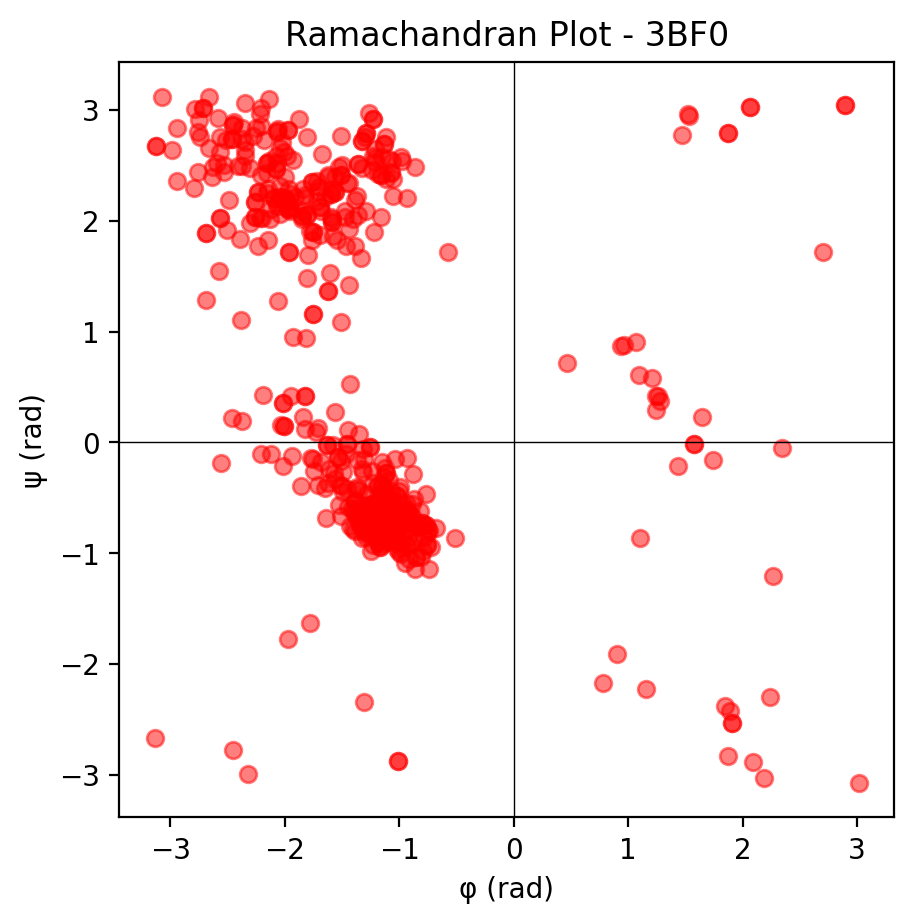

In [24]:
plt.figure(figsize=(5,5),dpi=200)
plt.scatter(x=df["phi"],y=df["psi"],alpha=0.5,c="r")
plt.xlabel("φ (rad)")
plt.ylabel("ψ (rad)")
plt.title(f"Ramachandran Plot - {pdb_id.upper()}")
plt.axhline(0,ls="-",c="black",lw=0.5)
plt.axvline(0,ls="-",c="black",lw=0.5);

Compare to the Ramachandran plot computed using the WHAT IF web server at https://swift.cmbi.umcn.nl/servers/html/ramaplot.html:

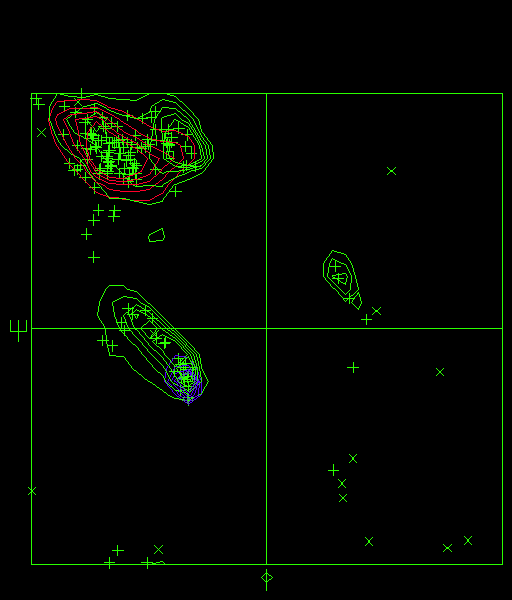

In [25]:
helix_a3 = df[(df["ResID"] >= 157-shift) & (df["ResID"] <= 164-shift)].copy()

In [26]:
helix_a3["phi"] = helix_a3["phi"].apply(lambda x: x*180/np.pi)
helix_a3["psi"] = helix_a3["psi"].apply(lambda x: x*180/np.pi)

In [27]:
helix_a3

,ResID,Residue Type,N x,N y,N z,CA x,CA y,CA z,C x,C y,C z,phi,psi
81,101,GLN,1.508,42.575,-27.321,2.717,42.715,-28.126,2.593,42.084,-29.536,-106.022347,115.305670
82,102,GLY,1.873,40.998,-29.682,1.629,40.505,-31.006,0.748,41.438,-31.837,-103.258259,85.102056
83,103,GLN,-0.419,41.773,-31.291,-1.371,42.639,-31.966,-0.767,43.963,-32.434,-104.378826,126.289472
84,104,TYR,0.154,44.497,-31.622,0.686,45.830,-31.850,1.704,45.859,-32.975,-146.285782,-10.628624
85,105,TYR,2.591,44.869,-33.007,3.480,44.640,-34.141,2.692,44.788,-35.439,107.399351,-162.243587
86,106,LEU,1.588,44.053,-35.527,0.769,44.096,-36.743,0.114,45.436,-36.922,-122.421611,145.535574
87,107,ALA,-0.523,45.936,-35.870,-1.256,47.187,-35.944,-0.330,48.314,-36.368,-147.167315,150.234716
88,108,SER,0.954,48.174,-36.057,1.908,49.252,-36.252,2.231,49.499,-37.723,-115.701010,155.226551


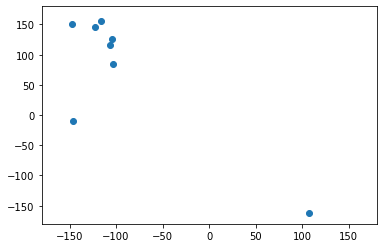

In [29]:
plt.scatter(helix_a3["phi"],helix_a3["psi"])
plt.xlim(-180,180)
plt.ylim(-180,180);

In [38]:
for i in range(len(helix_a3)-5+1):
    
    x1 = helix_a3["C x"].iloc[i]
    x2 = helix_a3["N x"].iloc[i+4]
    y1 = helix_a3["C y"].iloc[i]
    y2 = helix_a3["N y"].iloc[i]
    z1 = helix_a3["C z"].iloc[i]
    z2 = helix_a3["N z"].iloc[i]
    
    dist = ((x1-x2)**2 + (y1-y2)**2 + (z1-z2)**2)**0.5
    
    print(f"Hydrogen bond between {i} and {i+4} has a distance of {dist}")
    

Hydrogen bond between 0 and 4 has a distance of 2.2687683883552325
Hydrogen bond between 1 and 5 has a distance of 2.3544054451177283
Hydrogen bond between 2 and 6 has a distance of 2.482354728881427
Hydrogen bond between 3 and 7 has a distance of 2.061104800828917
